### Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Sneak Peak Data

In [5]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

#### Check Duplicates

In [8]:
df.duplicated().sum()

0

#### Check Nans

In [10]:
df.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [11]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

### EDA & Data Cleaning - Univariate Analysis on each feature and Correcting Inconsistencies

#### 1. Gender 

In [14]:
df['Gender'].value_counts()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

C:\Users\bavit\AppData\Local\Temp\ipykernel_18632\355425475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette =  ['darkblue', 'coral'] )


<Axes: xlabel='Gender', ylabel='count'>

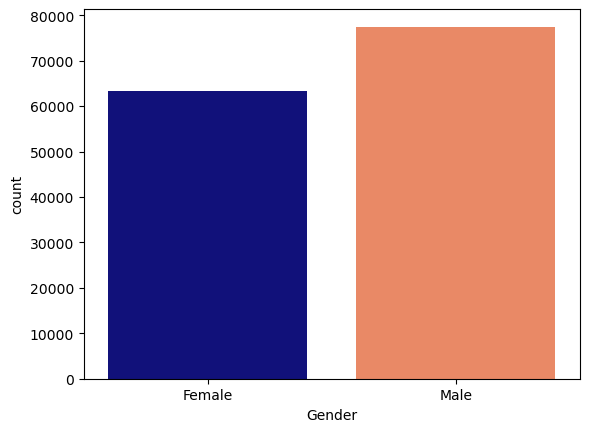

In [15]:
sns.countplot(x=df['Gender'], palette =  ['darkblue', 'coral'] )

#### 2. Age

<Axes: xlabel='Age', ylabel='Count'>

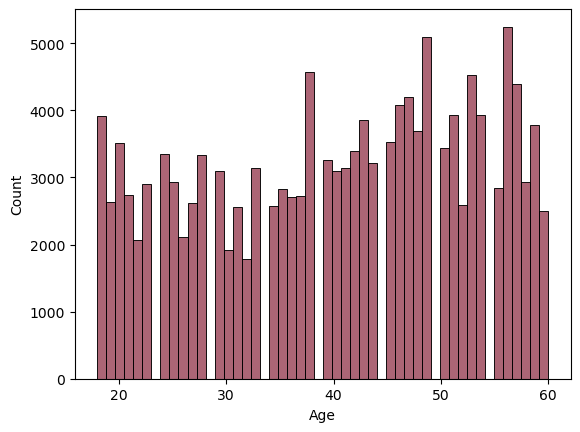

In [17]:
sns.histplot(x=df['Age'], color= '#913147')

#### 3. City Column

In [19]:
df['City'].value_counts(normalize = True)

City
Kalyan         0.046844
Patna          0.042104
Vasai-Virar    0.040974
Kolkata        0.040434
Ahmedabad      0.039893
                 ...   
Shrey          0.000007
Ivaan          0.000007
Vaanya         0.000007
Gaurav         0.000007
Unirar         0.000007
Name: proportion, Length: 98, dtype: float64

In [20]:
sorted(df['City'].unique())

['3.0',
 'Aaradhya',
 'Aditya',
 'Agra',
 'Ahmedabad',
 'Aishwarya',
 'Anvi',
 'Armaan',
 'Atharv',
 'Ayansh',
 'Ayush',
 'Bangalore',
 'Bhavna',
 'Bhopal',
 'Chennai',
 'Chhavi',
 'City',
 'Delhi',
 'Dhruv',
 'Faridabad',
 'Galesabad',
 'Gaurav',
 'Ghaziabad',
 'Gurgaon',
 'Harsh',
 'Harsha',
 'Hyderabad',
 'Indore',
 'Ishanabad',
 'Ishkarsh',
 'Ithal',
 'Itheg',
 'Ivaan',
 'Jaipur',
 'Jhanvi',
 'Kagan',
 'Kalyan',
 'Kanpur',
 'Kashish',
 'Kashk',
 'Keshav',
 'Khaziabad',
 'Khushi',
 'Kibara',
 'Kolkata',
 'Krinda',
 'Krishna',
 'Less Delhi',
 'Less than 5 Kalyan',
 'Lucknow',
 'Ludhiana',
 'M.Com',
 'M.Tech',
 'MCA',
 'ME',
 'MSc',
 'Mahi',
 'Malyansh',
 'Meerut',
 'Mihir',
 'Mira',
 'Molkata',
 'Moreadhyay',
 'Morena',
 'Mumbai',
 'Nagpur',
 'Nalini',
 'Nalyan',
 'Nandini',
 'Nashik',
 'No',
 'Parth',
 'Patna',
 'Plata',
 'Pooja',
 'Pratyush',
 'Pune',
 'Raghavendra',
 'Rajkot',
 'Rashi',
 'Researcher',
 'Reyansh',
 'Saanvi',
 'Shrey',
 'Srinagar',
 'Surat',
 'Thane',
 'Tolkata',
 '

In [21]:
valid_cities = ['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur', 
                'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
                'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat', 
                'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
                'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
                'Bhopal', 'Indore', 'Gurgaon', 'Morena']

df['City'] = np.where(df['City'].isin(valid_cities), df['City'], 'Other')
test['City'] = np.where(test['City'].isin(valid_cities), test['City'], 'Other')

#### 4. Working Professional or Student

In [23]:
df['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64

#### 5. Profession

In [25]:
df[df['Working Professional or Student']=='Working Professional']['Profession'].value_counts(dropna=False)

Profession
Teacher              24900
NaN                   8763
Content Writer        7812
Architect             4362
Consultant            4229
                     ...  
Dev                      1
BE                       1
B.Com                    1
Family Consultant        1
Yuvraj                   1
Name: count, Length: 65, dtype: int64

In [26]:
df['Profession'].dropna().unique()

array(['Chef', 'Teacher', 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yuvraj'

In [27]:
valid_professions = [
    'Chef', 'Teacher', 'Business Analyst', 'Financial Analyst', 'Chemist',
    'Electrician', 'Software Engineer', 'Data Scientist', 'Plumber',
    'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
    'UX/UI Designer', 'Content Writer', 'Educational Consultant',
    'Civil Engineer', 'Manager', 'Pharmacist', 'Architect',
    'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
    'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
    'Digital Marketer', 'Lawyer', 'Research Analyst', 'Sales Executive',
    'Doctor', 'Unemployed', 'Investment Banker', 'Family Consultant',
    'Student', 'Academic', 'Medical Doctor', 'Working Professional'
]
df['Profession'] = np.where(df['Profession'].isin(valid_professions), df['Profession'], 'Other')
test['Profession'] = np.where(test['Profession'].isin(valid_professions), test['Profession'], 'Other')

#### 6&7. Academic Pressure and Work Pressure

In [29]:
df[['Working Professional or Student', 'Academic Pressure']].value_counts(normalize=True, dropna=False)*100

Working Professional or Student  Academic Pressure
Working Professional             NaN                  80.166311
Student                          3.0                   5.303483
                                 5.0                   4.474769
                                 4.0                   3.663824
                                 1.0                   3.412225
                                 2.0                   2.969439
                                 NaN                   0.006397
Working Professional             4.0                   0.002132
                                 2.0                   0.000711
                                 3.0                   0.000711
Name: proportion, dtype: float64

In [30]:
df[['Working Professional or Student', 'Work Pressure']].value_counts(normalize=True, dropna=False)*100

Working Professional or Student  Work Pressure
Student                          NaN              19.828003
Working Professional             2.0              17.321962
                                 4.0              16.000000
                                 5.0              15.944563
                                 3.0              15.564321
                                 1.0              15.324805
                                 NaN               0.014215
Student                          5.0               0.001421
                                 2.0               0.000711
Name: proportion, dtype: float64

In [31]:
df['Academic Pressure'] = np.where((df['Working Professional or Student']=='Student')&(df['Work Pressure']>0),df['Work Pressure'],df['Academic Pressure'])

test['Academic Pressure'] = np.where((test['Working Professional or Student']=='Student')&(test['Work Pressure']>0),test['Work Pressure'],test['Academic Pressure'])

In [32]:
df['Work Pressure'] = np.where(df['Working Professional or Student']=='Student', 0, df['Work Pressure'])
test['Work Pressure'] = np.where(test['Working Professional or Student']=='Student', 0, test['Work Pressure'])

In [33]:
df[(df['Working Professional or Student']=='Working Professional') & (df['Academic Pressure']>0)]
test[(test['Working Professional or Student']=='Working Professional') & (test['Academic Pressure']>0)]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
4931,145631,Tina,Female,18.0,Srinagar,Working Professional,Other,2.0,NaN,8.04,5.0,NaN,More than 8 hours,Unhealthy,Class 12,Yes,6.0,4.0,No
49334,190034,Vani,Female,19.0,Pune,Working Professional,Other,2.0,NaN,NaN,4.0,NaN,Less than 5 hours,Moderate,Class 12,Yes,2.0,2.0,No


In [34]:
df[(df['Working Professional or Student']=='Working Professional') & (df['Work Pressure'].isna())]
test[(test['Working Professional or Student']=='Working Professional') & (test['Work Pressure'].isna())]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
4931,145631,Tina,Female,18.0,Srinagar,Working Professional,Other,2.0,NaN,8.04,5.0,NaN,More than 8 hours,Unhealthy,Class 12,Yes,6.0,4.0,No
9005,149705,Anand,Male,18.0,Vasai-Virar,Working Professional,Other,NaN,NaN,NaN,NaN,2.0,Less than 5 hours,Unhealthy,Class 12,Yes,9.0,4.0,No
20226,160926,Himani,Female,19.0,Rajkot,Working Professional,Other,NaN,NaN,NaN,NaN,2.0,Less than 5 hours,Moderate,Class 12,Yes,0.0,5.0,Yes
31133,171833,Sanya,Female,33.0,Kolkata,Working Professional,Other,NaN,NaN,9.88,5.0,NaN,More than 8 hours,Healthy,MCA,Yes,11.0,1.0,Yes
31798,172498,Janvi,Female,28.0,Mumbai,Working Professional,Other,NaN,NaN,NaN,NaN,NaN,5-6 hours,Unhealthy,BCA,Yes,8.0,4.0,No
34047,174747,Saanvi,Female,50.0,Thane,Working Professional,Other,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,2.0,5.0,No
41076,181776,Ila,Female,52.0,Kanpur,Working Professional,Other,NaN,NaN,NaN,NaN,2.0,7-8 hours,Unhealthy,M.Pharm,Yes,3.0,3.0,No
48976,189676,Tanisha,Female,37.0,Thane,Working Professional,Other,NaN,NaN,NaN,NaN,NaN,Less than 5 hours,Moderate,LLB,Yes,0.0,2.0,Yes
49334,190034,Vani,Female,19.0,Pune,Working Professional,Other,2.0,NaN,NaN,4.0,NaN,Less than 5 hours,Moderate,Class 12,Yes,2.0,2.0,No
69648,210348,Yash,Male,39.0,Bhopal,Working Professional,Other,NaN,NaN,NaN,NaN,3.0,Less than 5 hours,Moderate,Class 12,Yes,4.0,2.0,No


In [35]:
df['Work Pressure'] = np.where((df['Working Professional or Student']=='Working Professional')&(df['Academic Pressure']>0)&(df['Profession'].isna()==False),df['Academic Pressure'],df['Work Pressure'])
test['Work Pressure'] = np.where((test['Working Professional or Student']=='Working Professional')&(test['Academic Pressure']>0)&(test['Profession'].isna()==False),test['Academic Pressure'],test['Work Pressure'])

In [36]:
df['Academic Pressure'] = np.where(df['Working Professional or Student']=='Working Professional', 0, df['Academic Pressure'])
test['Academic Pressure'] = np.where(test['Working Professional or Student']=='Working Professional', 0, test['Academic Pressure'])

<Axes: xlabel='Academic Pressure', ylabel='Count'>

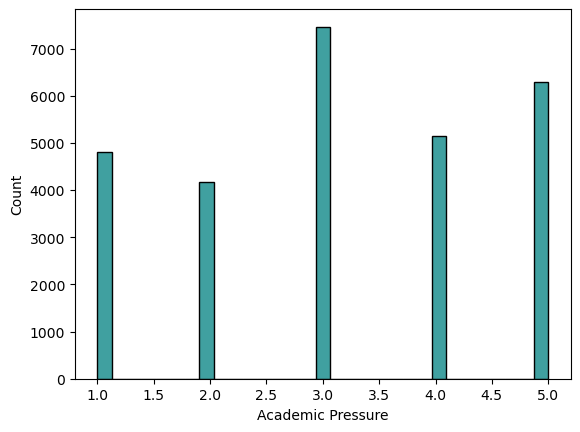

In [37]:
sns.histplot(x=df[df['Working Professional or Student']=='Student']['Academic Pressure'], color= 'teal')

<Axes: xlabel='Work Pressure', ylabel='Count'>

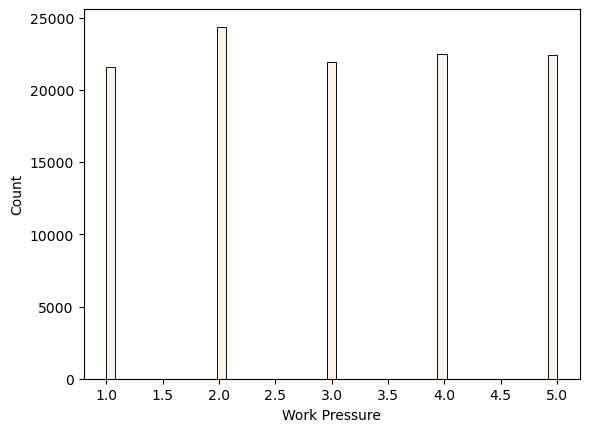

In [38]:
sns.histplot(x=df[df['Working Professional or Student']=='Working Professional']['Work Pressure'], color= 'linen')

#### 8. CGPA

In [40]:
df['CGPA'].value_counts()

CGPA
8.0400    822
9.9600    425
5.7400    410
8.9500    371
9.2100    343
         ... 
6.6400      1
7.0625      1
6.9800      1
6.4400      1
6.0900      1
Name: count, Length: 331, dtype: int64

In [41]:
df[['Working Professional or Student', 'CGPA']].value_counts(normalize=True, dropna=False)*100

Working Professional or Student  CGPA  
Working Professional             NaN       80.165601
Student                          8.0400     0.583511
                                 9.9600     0.302061
                                 5.7400     0.291400
                                 8.9500     0.263682
                                             ...    
                                 8.2600     0.000711
                                 7.0625     0.000711
                                 6.0900     0.000711
                                 7.4200     0.000711
                                 6.9800     0.000711
Name: proportion, Length: 339, dtype: float64

In [42]:
df['CGPA'] = np.where(df['Working Professional or Student']=='Working Professional', 0, df['CGPA'])
test['CGPA'] = np.where(test['Working Professional or Student']=='Working Professional', 0, test['CGPA'])

#### 9&10. Study Satisfaction & Job Satisfaction

In [44]:
df[['Working Professional or Student', 'Study Satisfaction']].value_counts(normalize=True, dropna=False)*100

Working Professional or Student  Study Satisfaction
Working Professional             NaN                   80.165601
Student                          4.0                    4.519545
                                 2.0                    4.149254
                                 3.0                    4.137171
                                 1.0                    3.874200
                                 5.0                    3.142857
                                 NaN                    0.007107
Working Professional             2.0                    0.001421
                                 3.0                    0.001421
                                 4.0                    0.000711
                                 5.0                    0.000711
Name: proportion, dtype: float64

In [45]:
df[['Working Professional or Student', 'Job Satisfaction']].value_counts(normalize=True, dropna=False)*100

Working Professional or Student  Job Satisfaction
Student                          NaN                 19.824449
Working Professional             2.0                 17.611940
                                 5.0                 16.213220
                                 1.0                 15.864961
                                 3.0                 15.600569
                                 4.0                 14.867093
                                 NaN                  0.012082
Student                          2.0                  0.002132
                                 1.0                  0.001421
                                 4.0                  0.001421
                                 3.0                  0.000711
Name: proportion, dtype: float64

In [46]:
df['Job Satisfaction'] = np.where(df['Working Professional or Student']=='Student', 0, df['Job Satisfaction'])
df['Study Satisfaction'] = np.where(df['Working Professional or Student']=='Working Professional', 0, df['Study Satisfaction'])

test['Job Satisfaction'] = np.where(test['Working Professional or Student']=='Student', 0, test['Job Satisfaction'])
test['Study Satisfaction'] = np.where(test['Working Professional or Student']=='Working Professional', 0, test['Study Satisfaction'])

In [47]:
df = df[~((df['Working Professional or Student'] == 'Student') & (df['Study Satisfaction'].isna()))]
df = df[~((df['Working Professional or Student'] == 'Working Professional') & (df['Job Satisfaction'].isna()))]
df = df[~((df['Working Professional or Student'] == 'Student') & (df['Job Satisfaction']>0))]

test = test[~((test['Working Professional or Student'] == 'Student') & (test['Study Satisfaction'].isna()))]
test = test[~((test['Working Professional or Student'] == 'Working Professional') & (test['Job Satisfaction'].isna()))]
test = test[~((test['Working Professional or Student'] == 'Student') & (test['Job Satisfaction']>0))]

#### 11. Sleep Duration

In [49]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38773
7-8 hours            36966
More than 8 hours    32722
5-6 hours            32133
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [50]:
valid_sleep_duration = ['Less than 5 hours','7-8 hours','More than 8 hours','5-6 hours']
df['Sleep Duration'] = np.where(df['Sleep Duration'].isin(valid_sleep_duration), df['Sleep Duration'], 'Other')
test['Sleep Duration'] = np.where(test['Sleep Duration'].isin(valid_sleep_duration), test['Sleep Duration'], 'Other')

#### 12. Dietary Habits

In [52]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49690
Unhealthy            46220
Healthy              44736
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [53]:
valid_dietary_habits = ['Moderate','Healthy','Unhealthy']
df = df[df['Dietary Habits'].isin(valid_dietary_habits)]
test = test[test['Dietary Habits'].isin(valid_dietary_habits)]

#### 13. Degree

In [55]:
df['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [56]:
# Valid degrees categorized by level
undergraduate_degrees = ['BHM', 'LLB', 'B.Pharm', 'BBA', 'BCA', 'BE', 'B.Tech', 'B.Com', 'B.Ed', 'B.Arch', 'BA', 'BSc', 'B.Sc']
postgraduate_degrees = ['MCA', 'MD', 'MBA', 'M.Com', 'M.Tech', 'M.Ed', 'MSc', 'MHM', 'MA', 'MPA', 'M.Pharm', 'M.Arch', 'M.Tech', 'MBBS', 'PhD']

valid_degrees = set(undergraduate_degrees + postgraduate_degrees)

In [57]:
df['Degree'] = np.where(df['Degree'].isin(valid_degrees), df['Degree'], 'Unknown')
test['Degree'] = np.where(test['Degree'].isin(valid_degrees), test['Degree'], 'Unknown')

In [58]:
degree_levels = {
    **dict.fromkeys(undergraduate_degrees, 'Undergraduate'),
    **dict.fromkeys(postgraduate_degrees, 'Postgraduate')
}

# Assign degree levels
df['Degree'] = df['Degree'].map(degree_levels).fillna('Unknown')
test['Degree'] = test['Degree'].map(degree_levels).fillna('Unknown')

#### 14. Have you ever had suicidal thoughts ?

In [60]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
No     71116
Yes    69530
Name: count, dtype: int64

#### 15. Work/Study Hours

In [62]:
df['Work/Study Hours'].value_counts()

Work/Study Hours
10.0    14198
11.0    12822
9.0     12708
0.0     12057
12.0    11406
2.0     10593
6.0     10429
7.0      9868
1.0      9798
3.0      9472
5.0      9333
4.0      9058
8.0      8904
Name: count, dtype: int64

<Axes: xlabel='Work/Study Hours', ylabel='Count'>

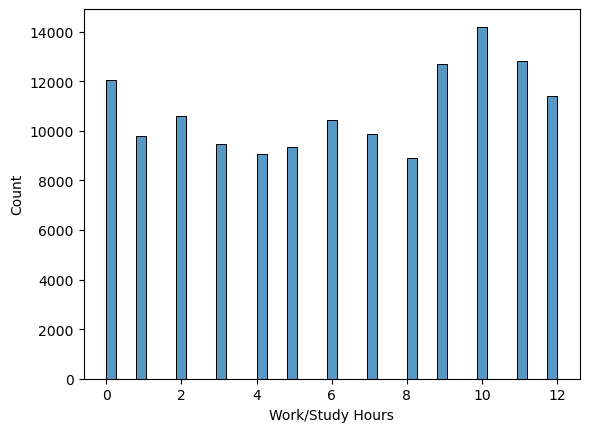

In [63]:
sns.histplot(x=df['Work/Study Hours'])

<Axes: xlabel='Work/Study Hours'>

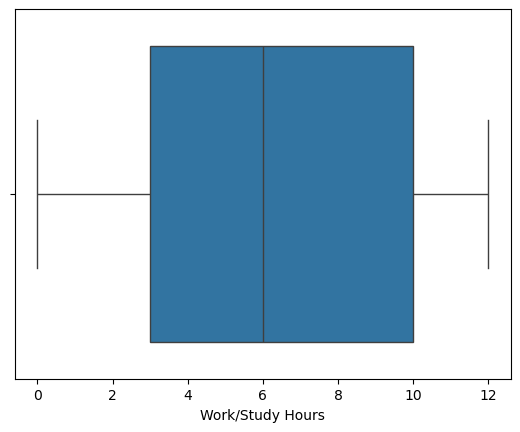

In [64]:
sns.boxplot(x=df['Work/Study Hours'])

#### 16.Financial Stress

In [66]:
df['Financial Stress'].value_counts(dropna=False)

Financial Stress
2.0    31446
5.0    28265
4.0    27754
1.0    27200
3.0    25977
NaN        4
Name: count, dtype: int64

#### 17. Family History of Mental Illness

In [68]:
df['Family History of Mental Illness'].value_counts(dropna=False)

Family History of Mental Illness
No     70724
Yes    69922
Name: count, dtype: int64

#### 18. Depression

In [70]:
df['Depression'].value_counts(dropna=False)

Depression
0    115102
1     25544
Name: count, dtype: int64

#### Further cleaning

In [72]:
df.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        2
Work Pressure                            8
CGPA                                     2
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         4
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [73]:
test.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        1
Work Pressure                            4
CGPA                                     4
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

In [74]:
df = df.dropna(subset=['Academic Pressure', 'Work Pressure', 'Financial Stress', 'CGPA'])
test = test.dropna(subset=['Academic Pressure', 'Work Pressure', 'Financial Stress', 'CGPA'])

### Bivariate Analysis on each feature and the target

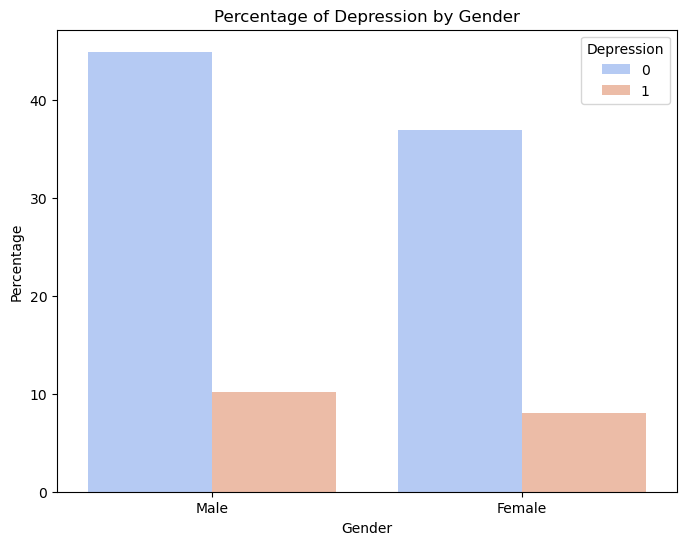

In [76]:
gender_proportions = df[['Gender', 'Depression']].value_counts(normalize=True)*100
gender_proportions = gender_proportions.reset_index()
gender_proportions.columns = ['Gender', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Proportion', hue='Depression', data=gender_proportions, palette = 'coolwarm')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by Gender')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

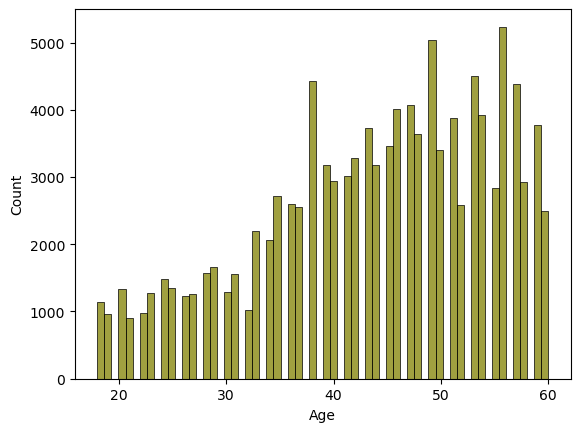

In [77]:
sns.histplot(x=df[df['Depression']==0]['Age'], color ='Olive')

<Axes: xlabel='Age', ylabel='Count'>

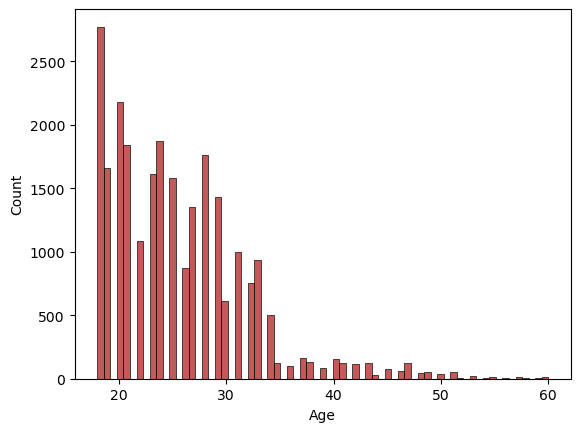

In [78]:
sns.histplot(x=df[df['Depression']==1]['Age'], color= 'firebrick')

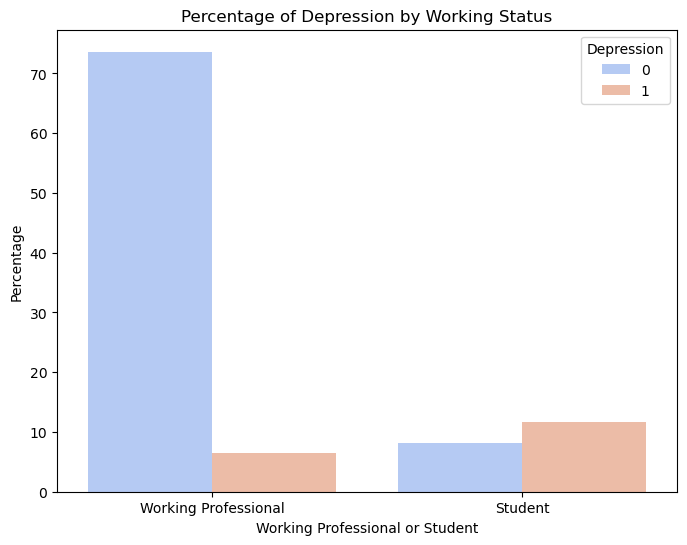

In [79]:
occupation_proportions = df[['Working Professional or Student','Depression']].value_counts(normalize=True)*100
occupation_proportions = occupation_proportions.reset_index()
occupation_proportions.columns = ['Working Professional or Student', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='Working Professional or Student', y='Proportion', hue='Depression', data=occupation_proportions, palette = 'coolwarm')
plt.xlabel('Working Professional or Student')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by Working Status')
plt.show()

<Axes: xlabel='Profession', ylabel='Count'>

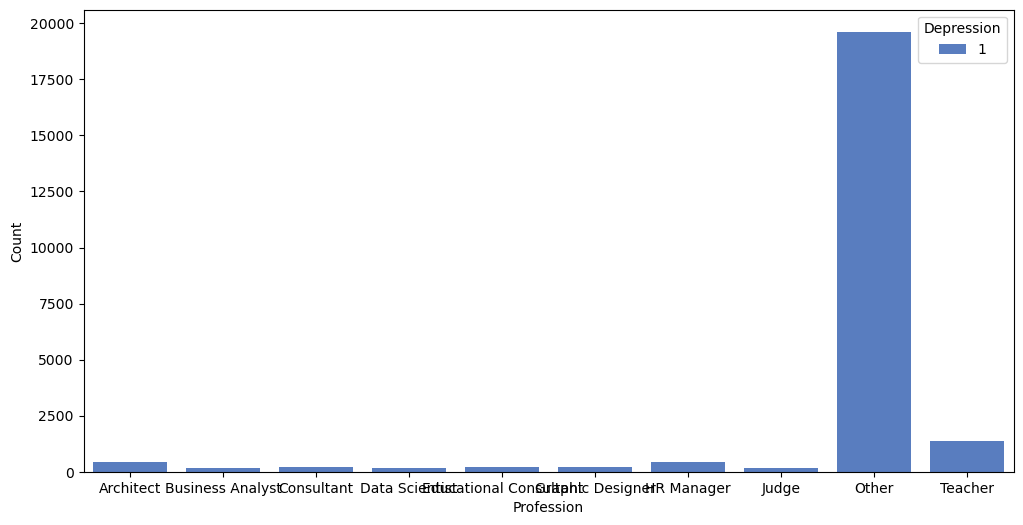

In [80]:
df_depression_1 = df[df['Depression'] == 1]
depression_counts = df_depression_1.groupby(['Profession', 'Depression']).size().reset_index(name='Count')
top_professions = depression_counts.groupby('Profession')['Count'].sum().nlargest(10).index
depression_counts_top10 = depression_counts[depression_counts['Profession'].isin(top_professions)]
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Profession', 
    y='Count', 
    hue='Depression', 
    data=depression_counts_top10, 
    palette='muted'
)

<Axes: xlabel='Academic Pressure', ylabel='Count'>

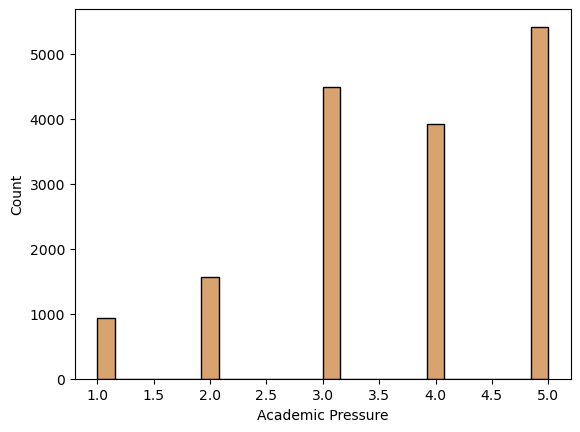

In [81]:
sns.histplot(x=df[(df['Working Professional or Student']=='Student')&(df['Depression']==1)]['Academic Pressure'], color= 'peru')

<Axes: xlabel='Work Pressure', ylabel='Count'>

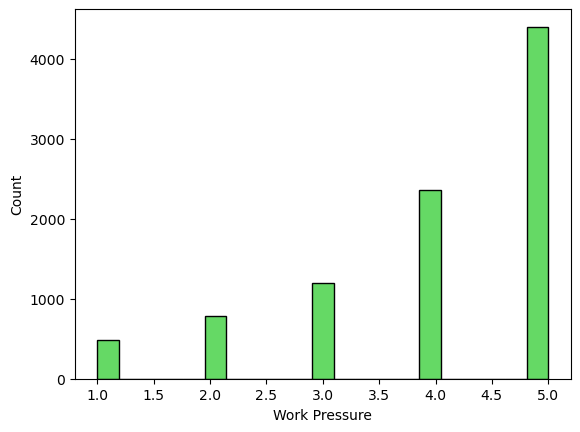

In [82]:
sns.histplot(x=df[(df['Working Professional or Student']=='Working Professional')&(df['Depression']==1)]['Work Pressure'], color= 'limegreen')

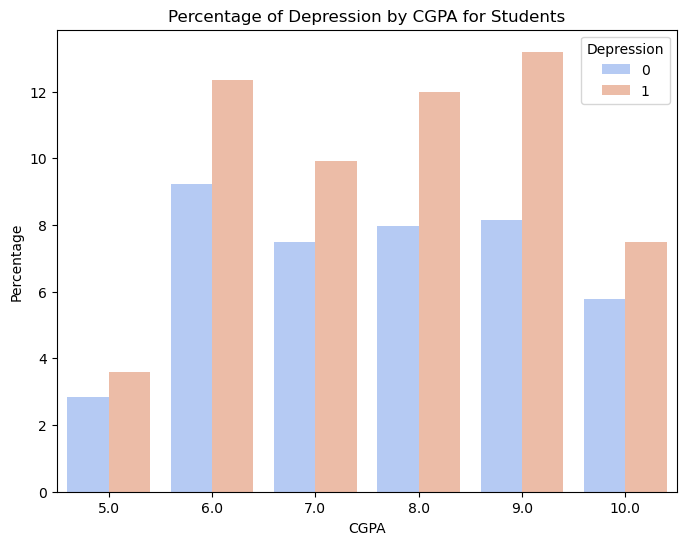

In [83]:
cgpa_proportions = df[df['Working Professional or Student']=='Student'][['CGPA','Depression']]
cgpa_proportions['CGPA'] = cgpa_proportions['CGPA'].round()
cgpa_proportions = cgpa_proportions.value_counts(normalize=True)*100
cgpa_proportions = cgpa_proportions.reset_index()

cgpa_proportions.columns = ['CGPA', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='CGPA', y='Proportion', hue='Depression', data=cgpa_proportions, palette = 'coolwarm')
plt.xlabel('CGPA')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by CGPA for Students')
plt.show()

<Axes: xlabel='CGPA', ylabel='Count'>

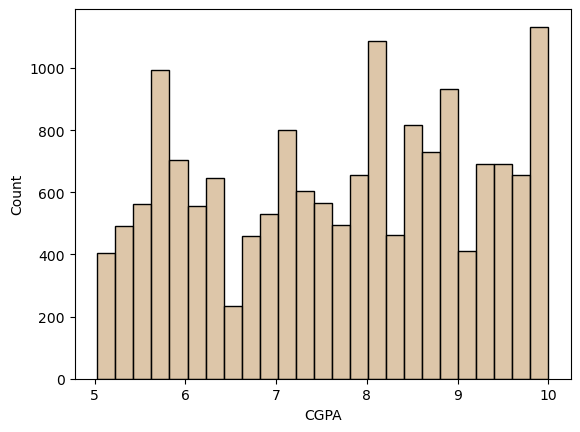

In [84]:
sns.histplot(x=df[(df['Working Professional or Student']=='Student')&(df['Depression']==1)]['CGPA'], color= 'tan')

<Axes: xlabel='CGPA', ylabel='Count'>

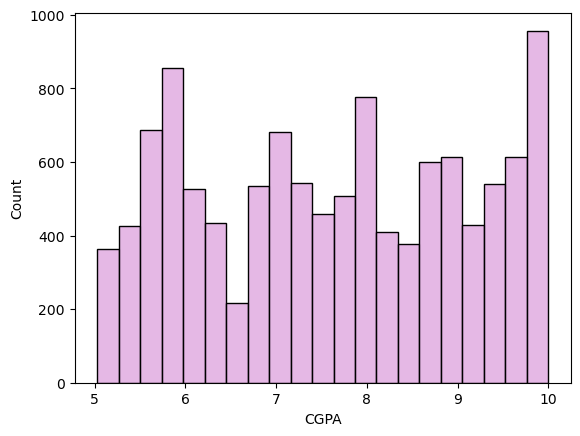

In [85]:
sns.histplot(x=df[(df['Working Professional or Student']=='Student')&(df['Depression']==0)]['CGPA'], color= 'plum')

<Axes: xlabel='Job Satisfaction', ylabel='Count'>

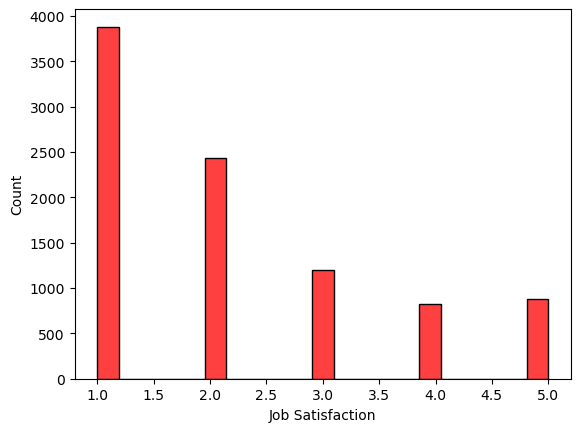

In [86]:
sns.histplot(x=df[(df['Working Professional or Student']=='Working Professional')&(df['Depression']==1)]['Job Satisfaction'], color= 'red')

<Axes: xlabel='Job Satisfaction', ylabel='Count'>

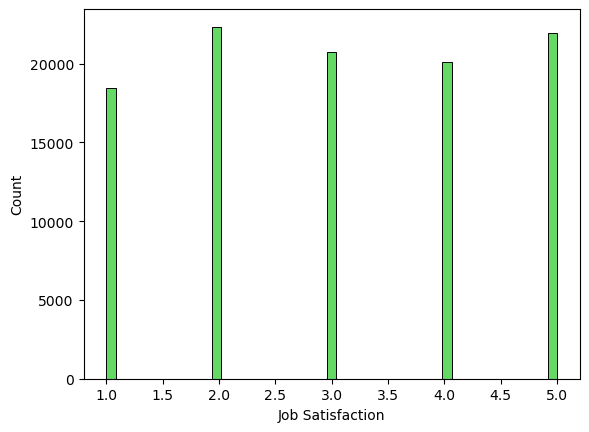

In [87]:
sns.histplot(x=df[(df['Working Professional or Student']=='Working Professional')&(df['Depression']==0)]['Job Satisfaction'], color= 'limegreen')

<Axes: xlabel='Study Satisfaction', ylabel='Count'>

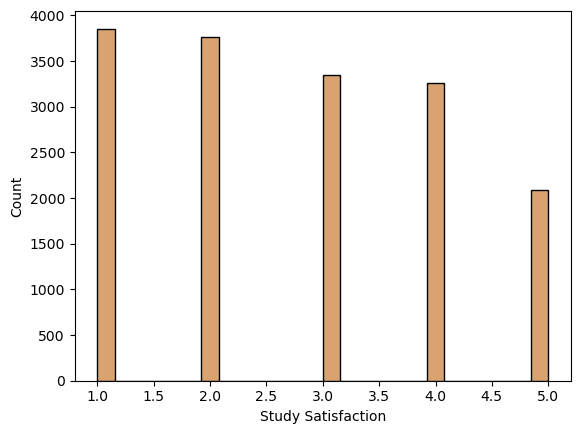

In [88]:
sns.histplot(x=df[(df['Working Professional or Student']=='Student')&(df['Depression']==1)]['Study Satisfaction'], color= 'peru')

<Axes: xlabel='Study Satisfaction', ylabel='Count'>

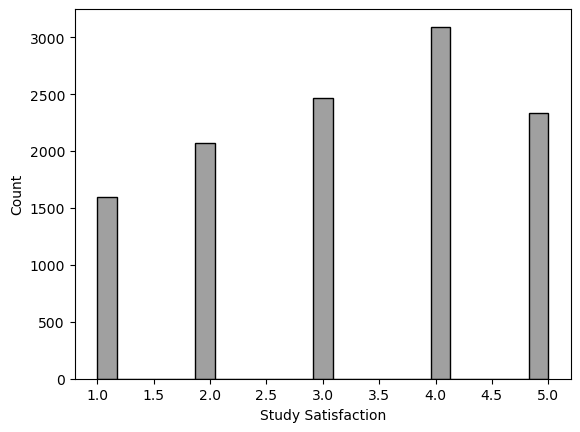

In [89]:
sns.histplot(x=df[(df['Working Professional or Student']=='Student')&(df['Depression']==0)]['Study Satisfaction'], color= 'grey')

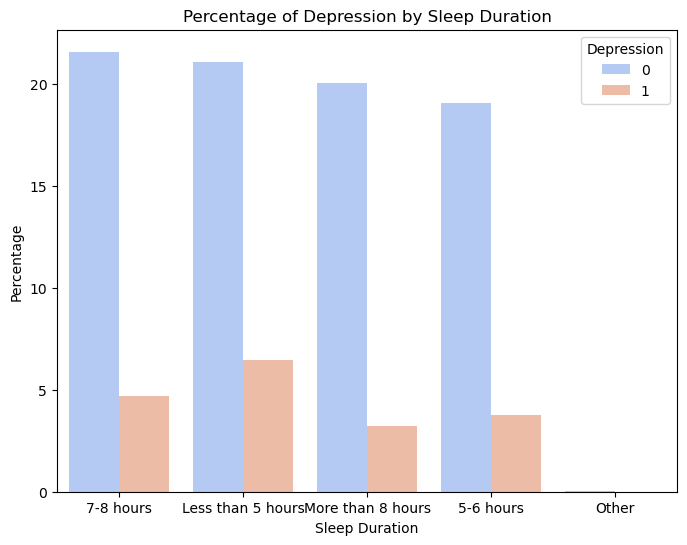

In [90]:
sleep_proportions = df[['Sleep Duration', 'Depression']].value_counts(normalize=True)*100
sleep_proportions = sleep_proportions.reset_index()
sleep_proportions.columns = ['Sleep Duration', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='Sleep Duration', y='Proportion', hue='Depression', data=sleep_proportions, palette = 'coolwarm')
plt.xlabel('Sleep Duration')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by Sleep Duration')
plt.show()

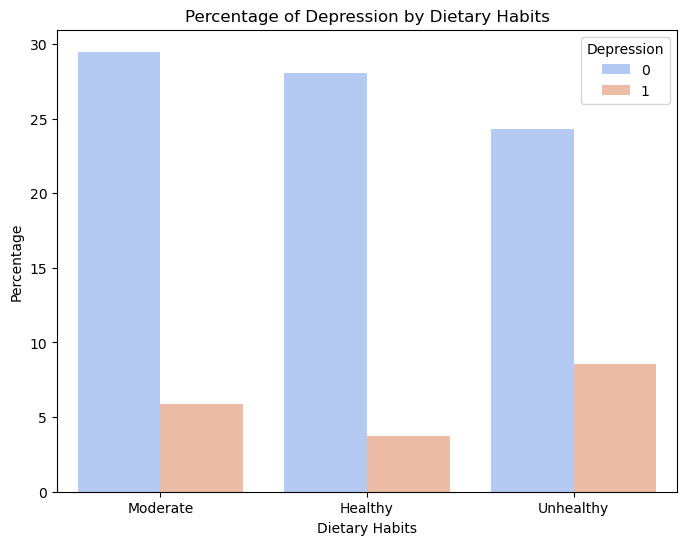

In [91]:
diet_proportions = df[['Dietary Habits', 'Depression']].value_counts(normalize=True)*100
diet_proportions = diet_proportions.reset_index()
diet_proportions.columns = ['Dietary Habits', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='Dietary Habits', y='Proportion', hue='Depression', data=diet_proportions, palette = 'coolwarm')
plt.xlabel('Dietary Habits')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by Dietary Habits')
plt.show()

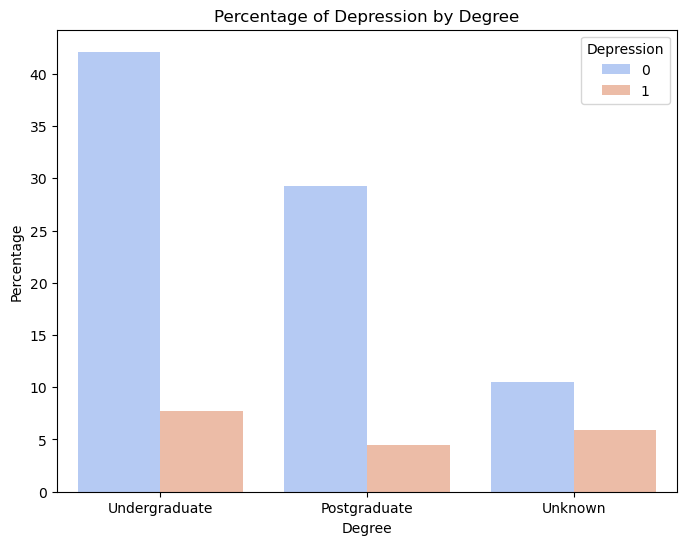

In [92]:
degree_proportions = df[['Degree', 'Depression']].value_counts(normalize=True)*100
degree_proportions = degree_proportions.reset_index()
degree_proportions.columns = ['Degree', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='Degree', y='Proportion', hue='Depression', data=degree_proportions, palette = 'coolwarm')
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by Degree')
plt.show()

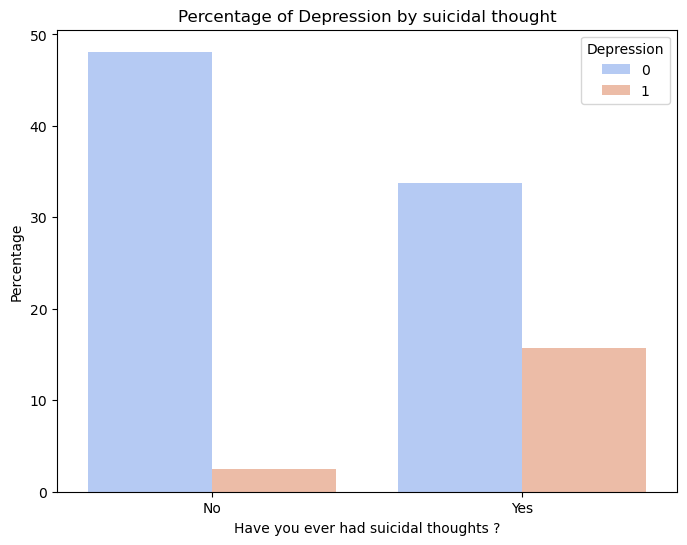

In [93]:
suicidal_proportions = df[['Have you ever had suicidal thoughts ?', 'Depression']].value_counts(normalize=True)*100
suicidal_proportions = suicidal_proportions.reset_index()
suicidal_proportions.columns = ['Have you ever had suicidal thoughts ?', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='Have you ever had suicidal thoughts ?', y='Proportion', hue='Depression', data=suicidal_proportions, palette = 'coolwarm')
plt.xlabel('Have you ever had suicidal thoughts ?')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by suicidal thought')
plt.show()

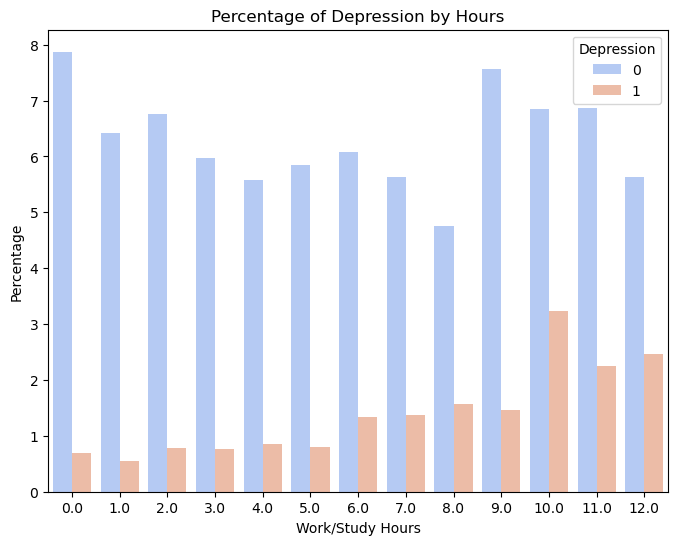

In [94]:
hours_proportions = df[['Work/Study Hours', 'Depression']].value_counts(normalize=True)*100
hours_proportions = hours_proportions.reset_index()
hours_proportions.columns = ['Work/Study Hours', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='Work/Study Hours', y='Proportion', hue='Depression', data=hours_proportions, palette = 'coolwarm')
plt.xlabel('Work/Study Hours')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by Hours')
plt.show()

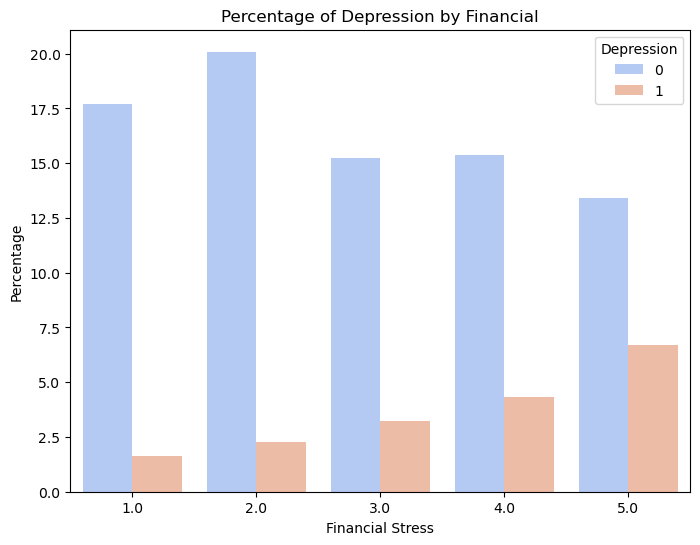

In [95]:
financial_proportions = df[['Financial Stress', 'Depression']].value_counts(normalize=True)*100
financial_proportions = financial_proportions.reset_index()
financial_proportions.columns = ['Financial Stress', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='Financial Stress', y='Proportion', hue='Depression', data=financial_proportions, palette = 'coolwarm')
plt.xlabel('Financial Stress')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by Financial')
plt.show()

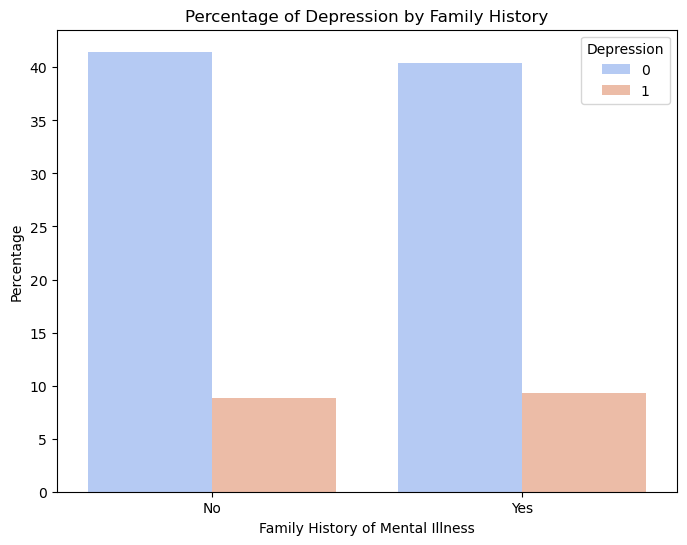

In [96]:
history_proportions = df[['Family History of Mental Illness', 'Depression']].value_counts(normalize=True)*100
history_proportions = history_proportions.reset_index()
history_proportions.columns = ['Family History of Mental Illness', 'Depression', 'Proportion']
plt.figure(figsize=(8, 6))
sns.barplot(x='Family History of Mental Illness', y='Proportion', hue='Depression', data=history_proportions, palette = 'coolwarm')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Percentage')
plt.title('Percentage of Depression by Family History')
plt.show()

In [97]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

### Data Preprocessing

In [99]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

#### Drop unwanted columns

In [101]:
df = df.drop(columns = ['id','Name'])
test = test.drop(columns = ['id','Name'])

In [102]:
df.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

#### Create Binary Columns for Suicidal Thoughts, Family History

In [104]:
df['Suicidal Thoughts'] = (df['Have you ever had suicidal thoughts ?'] == 'Yes').astype(int)
df['Family History'] = (df['Family History of Mental Illness'] == 'Yes').astype(int)

test['Suicidal Thoughts'] = (test['Have you ever had suicidal thoughts ?'] == 'Yes').astype(int)
test['Family History'] = (test['Family History of Mental Illness'] == 'Yes').astype(int)

In [105]:
df = df.drop(['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'], axis=1)
test = test.drop(['Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'], axis=1)

#### Create Categorical Features for Gender, City, Working Professional or Student, Profession, Degree

In [107]:
categorical_cols = ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Degree']
df = pd.get_dummies(df, columns=categorical_cols)
test = pd.get_dummies(test, columns=categorical_cols)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140630 entries, 0 to 140699
Data columns (total 94 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Age                                                   140630 non-null  float64
 1   Academic Pressure                                     140630 non-null  float64
 2   Work Pressure                                         140630 non-null  float64
 3   CGPA                                                  140630 non-null  float64
 4   Study Satisfaction                                    140630 non-null  float64
 5   Job Satisfaction                                      140630 non-null  float64
 6   Sleep Duration                                        140630 non-null  object 
 7   Dietary Habits                                        140630 non-null  object 
 8   Work/Study Hours                                 

#### Create Ordinal Features for Sleep Duration and Dietary Habits

In [110]:
# Ordinal mappings
ordinal_mappings = {
    'Sleep Duration': {
        'Less than 5 hours': 1, '5-6 hours': 2,
        '7-8 hours': 3, 'More than 8 hours': 5, 'Other':0
    },
    'Dietary Habits': {
        'Unhealthy': 1, 'Moderate': 2, 'Healthy': 3
    }
}

# Apply ordinal mappings
for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)
    test[col] = test[col].map(mapping)

#### Correlation Analysis

In [336]:
df.columns

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Work/Study Hours', 'Financial Stress', 'Depression',
       'Suicidal Thoughts', 'Family History', 'Gender_Female', 'Gender_Male',
       'City_Agra', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad',
       'City_Gurgaon', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow',
       'City_Ludhiana', 'City_Meerut', 'City_Morena', 'City_Mumbai',
       'City_Nagpur', 'City_Nashik', 'City_Other', 'City_Patna', 'City_Pune',
       'City_Rajkot', 'City_Srinagar', 'City_Surat', 'City_Thane',
       'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam', 'Working Professional or Student_Student',
       'Working Professional or Student_Working Professional',
       'Profession_Aca

In [338]:
corr = abs(df[['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Work/Study Hours', 'Financial Stress','Suicidal Thoughts', 'Family History']].corr())

<Axes: >

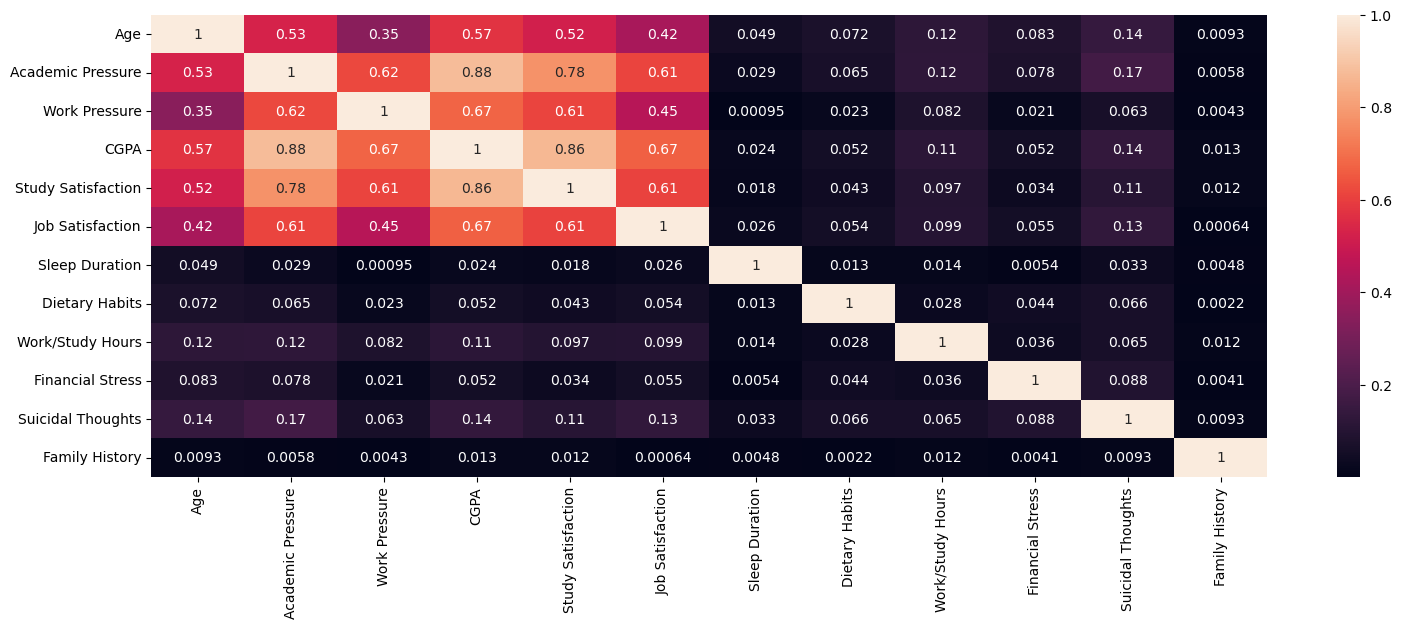

In [344]:
plt.figure(figsize=(18, 6))
sns.heatmap(corr,annot=True)

### Model Training

#### Model 1

In [113]:
x = df.drop('Depression', axis =1)
y = df['Depression']

In [114]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [306]:
# Train XGBoost with better parameters
def train_model(X_train, y_train, X_val, y_val):
    model = xgb.XGBClassifier(
        max_depth=4,
        learning_rate=0.05,
        n_estimators=200,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=7,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=100
    )
    
    return model

In [308]:
model = train_model(x_train, y_train, x_val, y_val)

[0]	validation_0-logloss:0.50346


C:\Users\bavit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:53:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-logloss:0.17680
[199]	validation_0-logloss:0.16558


In [309]:
val_preds = model.predict_proba(x_val)[:, 1]

In [310]:
print(f"\nValidation AUC-ROC: {roc_auc_score(y_val, val_preds)}")


Validation AUC-ROC: 0.9697934836715207


#### Model 2 (Only for Students)

In [120]:
df.columns

Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Work/Study Hours', 'Financial Stress', 'Depression',
       'Suicidal Thoughts', 'Family History', 'Gender_Female', 'Gender_Male',
       'City_Agra', 'City_Ahmedabad', 'City_Bangalore', 'City_Bhopal',
       'City_Chennai', 'City_Delhi', 'City_Faridabad', 'City_Ghaziabad',
       'City_Gurgaon', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow',
       'City_Ludhiana', 'City_Meerut', 'City_Morena', 'City_Mumbai',
       'City_Nagpur', 'City_Nashik', 'City_Other', 'City_Patna', 'City_Pune',
       'City_Rajkot', 'City_Srinagar', 'City_Surat', 'City_Thane',
       'City_Vadodara', 'City_Varanasi', 'City_Vasai-Virar',
       'City_Visakhapatnam', 'Working Professional or Student_Student',
       'Working Professional or Student_Working Professional',
       'Profession_Aca

In [268]:
student_df = df[['Age', 'Academic Pressure','CGPA','Study Satisfaction','Sleep Duration','Dietary Habits',
       'Work/Study Hours', 'Financial Stress',
       'Depression', 'Suicidal Thoughts',
       'Family History', 'Gender_Female', 'Gender_Male',
       'Working Professional or Student_Student',
       'Degree_Postgraduate',
       'Degree_Undergraduate', 'Degree_Unknown']]
student_df = student_df[student_df['Working Professional or Student_Student']==1]

In [270]:
student_df.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Depression,Suicidal Thoughts,Family History,Gender_Female,Gender_Male,Working Professional or Student_Student,Degree_Postgraduate,Degree_Undergraduate,Degree_Unknown
2,33.0,5.0,8.97,2.0,2,3,3.0,1.0,1,1,0,False,True,True,False,True,False
8,24.0,2.0,5.90,5.0,2,2,3.0,2.0,0,0,1,True,False,True,False,True,False
26,31.0,3.0,7.03,5.0,1,3,9.0,1.0,0,0,1,False,True,True,False,True,False
30,28.0,3.0,5.59,2.0,3,2,4.0,5.0,1,1,1,True,False,True,False,True,False
32,25.0,4.0,8.13,3.0,2,2,1.0,1.0,0,1,0,True,False,True,True,False,False


In [272]:
x = student_df.drop('Depression', axis =1)
y = student_df['Depression']

In [274]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [284]:
# Train XGBoost with better parameters
def train_model(X_train, y_train, X_val, y_val):
    model = xgb.XGBClassifier(
        max_depth=4,
        learning_rate=0.05,
        n_estimators=200,
        min_child_weight=4,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=8,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=100
    )
    
    return model

In [286]:
model = train_model(x_train, y_train, x_val, y_val)

[0]	validation_0-logloss:0.83886


C:\Users\bavit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:51:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-logloss:0.56420
[199]	validation_0-logloss:0.55122


In [288]:
val_preds = model.predict_proba(x_val)[:, 1]

In [290]:
print(f"\nValidation AUC-ROC: {roc_auc_score(y_val, val_preds)}")


Validation AUC-ROC: 0.9223553725362927


#### Model 3 (Only for Working Professionals)

In [292]:
professionals_df = df[['Age', 'Work Pressure', 'CGPA',
        'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Work/Study Hours', 'Financial Stress', 'Depression',
       'Suicidal Thoughts', 'Family History', 'Gender_Female', 'Gender_Male',
       'Working Professional or Student_Working Professional',
       'Profession_Academic', 'Profession_Accountant', 'Profession_Architect',
       'Profession_Business Analyst', 'Profession_Chef', 'Profession_Chemist',
       'Profession_Civil Engineer', 'Profession_Consultant',
       'Profession_Content Writer', 'Profession_Customer Support',
       'Profession_Data Scientist', 'Profession_Digital Marketer',
       'Profession_Doctor', 'Profession_Educational Consultant',
       'Profession_Electrician', 'Profession_Entrepreneur',
       'Profession_Family Consultant', 'Profession_Financial Analyst',
       'Profession_Graphic Designer', 'Profession_HR Manager',
       'Profession_Investment Banker', 'Profession_Judge', 'Profession_Lawyer',
       'Profession_Manager', 'Profession_Marketing Manager',
       'Profession_Mechanical Engineer', 'Profession_Medical Doctor',
       'Profession_Other', 'Profession_Pharmacist', 'Profession_Pilot',
       'Profession_Plumber', 'Profession_Research Analyst',
       'Profession_Researcher', 'Profession_Sales Executive',
       'Profession_Software Engineer', 'Profession_Student',
       'Profession_Teacher', 'Profession_Travel Consultant',
       'Profession_UX/UI Designer', 'Profession_Unemployed',
       'Profession_Working Professional', 'Degree_Postgraduate',
       'Degree_Undergraduate', 'Degree_Unknown']]
professionals_df = professionals_df[professionals_df['Working Professional or Student_Working Professional']==1]

In [294]:
x = professionals_df.drop('Depression', axis =1)
y = professionals_df['Depression']

In [296]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [298]:
# Train XGBoost with better parameters
def train_model(X_train, y_train, X_val, y_val):
    model = xgb.XGBClassifier(
        max_depth=4,
        learning_rate=0.05,
        n_estimators=200,
        min_child_weight=4,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=8,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=100
    )
    
    return model

In [300]:
model = train_model(x_train, y_train, x_val, y_val)

[0]	validation_0-logloss:0.54231


C:\Users\bavit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:52:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-logloss:0.18794
[199]	validation_0-logloss:0.17565


In [302]:
val_preds = model.predict_proba(x_val)[:, 1]

In [304]:
print(f"\nValidation AUC-ROC: {roc_auc_score(y_val, val_preds)}")


Validation AUC-ROC: 0.9698777301949177


#### Model 4 without cities

In [315]:
df_short = df[['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Work/Study Hours', 'Financial Stress', 'Depression',
       'Suicidal Thoughts', 'Family History', 'Gender_Female', 'Gender_Male',
       'Working Professional or Student_Student',
       'Working Professional or Student_Working Professional',
       'Degree_Postgraduate',
       'Degree_Undergraduate', 'Degree_Unknown']]

In [317]:
x = df_short.drop('Depression', axis =1)
y = df_short['Depression']

In [319]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [321]:
# Train XGBoost with better parameters
def train_model(X_train, y_train, X_val, y_val):
    model = xgb.XGBClassifier(
        max_depth=4,
        learning_rate=0.05,
        n_estimators=200,
        min_child_weight=4,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=8,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=100
    )
    
    return model

In [323]:
model = train_model(x_train, y_train, x_val, y_val)

[0]	validation_0-logloss:0.85882


C:\Users\bavit\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:56:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-logloss:0.27801
[199]	validation_0-logloss:0.26167


In [325]:
val_preds = model.predict_proba(x_val)[:, 1]

In [327]:
print(f"\nValidation AUC-ROC: {roc_auc_score(y_val, val_preds)}")


Validation AUC-ROC: 0.972317577139759
